# Obesity Level Analysis

In [350]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [351]:
df = pd.read_csv('obesity_levels.csv')

- Gender: categorical variable that shows the biological sex of the individual (male or female).
- Age: numerical variable that shows the individual’s age in years.
- Height: numerical variable that shows the individuals’ height in meters.
- Weight: numerical variable that shows the individuals’ weight in kilograms.
- Family history of overweight: categorical variable that shows if the individual has a family member who is overweight or obese (yes or no).
- Frequently consumed high-calorie food (FAVC): categorical variable that shows if the individual often eats high-calorie food (yes or no).
- Frequency of consumption of vegetables (FCVC): ordinal variable that shows how often the individual eats vegetables (1 = never, 2 = sometimes, 3 = always).
- Number of main meals (NCP): ordinal variable that shows how many main meals the individual has daily (1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer).
- Consumption of food between meals (CAEC): ordinal variable that shows how often the individual eats food between meals (1 = no, 2 = sometimes, 3 = frequently, 4 = always).
- SMOKE: categorical variable that shows whether the individual smokes or not (yes or no).
- Consumption of water daily (CH2O): ordinal variable that shows how much water the individual drinks daily (1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L).
- Monitor calorie intake (SCC): categorical variable that shows if the individual keeps track of their caloric intake (yes or no).
- Frequency of physical activity (FAF): ordinal variable that shows how often the individual does physical activity (1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week).
- Time using electronic devices (TUE): ordinal variable that shows how long the individual uses electronic devices (0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours).
- Consumption of alcohol (CALC): ordinal variable that shows how often the individual drinks alcohol (1 = no, 2 = sometimes, 3 = frequently, 4 = always).
- Type of transportation used (MTRANS): categorical variable that shows what kind of transportation the individual uses (automobile, motorbike, bike, public transportation, walking).
- Level of obesity according to body mass index (NObesity): ordinal variable that shows the obesity level of the individual according to their BMI (insufficient weight normal weight, overweight level I, overweight level II, obesity type I, obesity type II, obesity type III). The related attribute was the primary outcome

In [352]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Our objective is to analyze people based on their obesity level and behaviour or factors contirbuting to the their obesity levels, so we will include some variables that would help group the people into multiple clusters with different behaviours and obesity levels:  
- Age: Age is an important demographic factor associated with obesity risk.
- Family history of overweight: This variable indicates whether an individual has a family history of overweight or obesity, -which can influence obesity risk.
- Frequently consumed high-calorie food (FAVC): Dietary habits, particularly consumption of high-calorie foods, can contribute to obesity risk.
- Frequency of consumption of vegetables (FCVC): Consumption of vegetables, which are generally low in calories and high in nutrients, may affect obesity risk.
- Frequency of physical activity (FAF): Regular physical activity is essential for maintaining a healthy weight and reducing obesity risk.
- Consumption of alcohol (CALC): Excessive alcohol consumption can contribute to weight gain and obesity.
- Type of transportation used (MTRANS): Transportation habits may reflect overall activity levels and could influence obesity risk.
- Level of obesity according to body mass index (NObesity): This is the primary outcome variable, representing the obesity level of the individual according to their BMI.

In [353]:
df_hierarchial = df.copy()

df_cluster = df[['Age', 'Height', 'Weight','family_history_with_overweight','FAVC','FCVC','FAF','CALC','MTRANS','NObeyesdad']].copy()


In [354]:
df_cluster.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,FAF,CALC,MTRANS,NObeyesdad
0,21.0,1.62,64.0,yes,no,2.0,0.0,no,Public_Transportation,Normal_Weight
1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,1.80,77.0,yes,no,2.0,2.0,Frequently,Public_Transportation,Normal_Weight
3,27.0,1.80,87.0,no,no,3.0,2.0,Frequently,Walking,Overweight_Level_I
4,22.0,1.78,89.8,no,no,2.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [355]:
df_cluster.describe(include='all')

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,FAF,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111
unique,NaN,NaN,NaN,2,2,NaN,NaN,4,5,7
top,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,NaN,NaN,NaN,1726,1866,NaN,NaN,1401,1580,351
mean,24.312600,1.701677,86.586058,NaN,NaN,2.419043,1.010298,NaN,NaN,NaN
std,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.850592,NaN,NaN,NaN
min,14.000000,1.450000,39.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
25%,19.947192,1.630000,65.473343,NaN,NaN,2.000000,0.124505,NaN,NaN,NaN
50%,22.777890,1.700499,83.000000,NaN,NaN,2.385502,1.000000,NaN,NaN,NaN
75%,26.000000,1.768464,107.430682,NaN,NaN,3.000000,1.666678,NaN,NaN,NaN


## Feature Engineering

### Feature Scaling

Firstly, we can the that `Age`, `Height`, `Weight` are numerical columns with different ranges and no obvious outliers we will use the `MinMaxScaler` from sklearn library to standardize the values for clustering to give equal weight to each variable. while `FCVC` and `FAF` are ordinal variables which will aslo be scaled to ensure equal weights   

In [356]:
numerical_columns = ['Age', 'Height', 'Weight','FCVC','FAF']

scaler = MinMaxScaler()

df_cluster[numerical_columns] = scaler.fit_transform(df_cluster[numerical_columns])

In [357]:
df_cluster.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,FAF,CALC,MTRANS,NObeyesdad
0,0.148936,0.320755,0.186567,yes,no,0.5,0.000000,no,Public_Transportation,Normal_Weight
1,0.148936,0.132075,0.126866,yes,no,1.0,1.000000,Sometimes,Public_Transportation,Normal_Weight
2,0.191489,0.660377,0.283582,yes,no,0.5,0.666667,Frequently,Public_Transportation,Normal_Weight
3,0.276596,0.660377,0.358209,no,no,1.0,0.666667,Frequently,Walking,Overweight_Level_I
4,0.170213,0.622642,0.379104,no,no,0.5,0.000000,Sometimes,Public_Transportation,Overweight_Level_II


### Feature Encoding

Next, we have some categorical columns which need to be encoded in order to be use in clustering. We will be using one-hot encoding to handle the categorical data and ensure no weight is given some of the variables with high unique categories.

In [358]:
categorical_columns = ['family_history_with_overweight', 'FAVC', 'CALC', 'MTRANS', 'NObeyesdad']

# one-hot encoding
df_cluster = pd.get_dummies(df_cluster, columns=categorical_columns, drop_first=True)


Due to the objective of our project we will be assigning extra weight the obesity level such that clusters are based more on different obesity levels and their characterstics. 

In [359]:
column_weights = {
    'NObeyesdad_Normal_Weight': 1,
    'NObeyesdad_Obesity_Type_I': 2,
    'NObeyesdad_Obesity_Type_II': 2,
    'NObeyesdad_Obesity_Type_III': 2,
    'NObeyesdad_Overweight_Level_I': 3,
    'NObeyesdad_Overweight_Level_II': 3
}

# Multiply each column by its respective weight
for column, weight in column_weights.items():
    df_cluster[column] *= weight

In [360]:
df_cluster.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'FAF',
       'family_history_with_overweight_yes', 'FAVC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')

In [361]:
df_cluster.head()

,Age,Height,Weight,FCVC,FAF,family_history_with_overweight_yes,FAVC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0.148936,0.320755,0.186567,0.5,0.000000,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0.148936,0.132075,0.126866,1.0,1.000000,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
2,0.191489,0.660377,0.283582,0.5,0.666667,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0
3,0.276596,0.660377,0.358209,1.0,0.666667,0,0,1,0,0,0,0,0,1,0,0,0,0,3,0
4,0.170213,0.622642,0.379104,0.5,0.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,3


## Kmedoids

### Inertia (WCSS)

Now, that we are doing with preparing the data for clustering we will start modeling our model and using `intertia` `Total within-cluster sum of squares` which is the sum of the squared distance between each point and the centroid in a cluster (WCSS for short)  to choose the number of clusters using the `elbow method`

In [362]:
def kmedoids_wcss(num_clusters, x_vals):

    wcss_values = []
    for num in num_clusters:
        kmedoids = KMedoids(n_clusters=num, random_state=0)
        kmedoids.fit(x_vals)
        wcss_values.append(kmedoids.inertia_)  # WCSS represents within-cluster sum of squares

    return wcss_values

In [363]:
num_clusters = [i for i in range(2, 13)]
wcss_values = kmedoids_wcss(num_clusters, df_cluster)
wcss_values

[4942.387913221304,
 4933.814917617157,
 4339.287557492653,
 4329.184813116551,
 4266.899048971443,
 4265.593650797502,
 4263.4936615902925,
 1914.0997196083774,
 1762.859717594832,
 1883.1450424894085,
 1838.7514150660427]

Text(0, 0.5, 'WCSS')

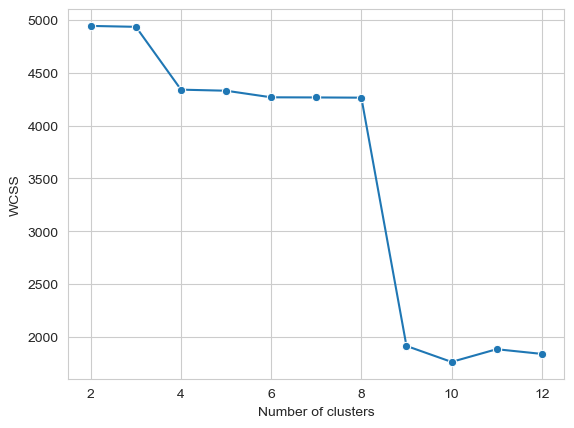

In [364]:
#elbow curve
plot = sns.lineplot(x=num_clusters, y=wcss_values, marker = 'o')
plt.grid(True)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("WCSS")

While this plot isn't like the normal elbow curve we can still clearly extract two elbow points which are 9 clusters and 10 clusters, which are very close in their wcss score.

Next, we will use Davies Bouldin score to evaluate the number of clusters to determine the most optimal number of clusters.

### Davies Bouldin

The Davies-Bouldin Index is a metric used to evaluate the quality of clustering algorithms. It measures the average similarity between each cluster and its most similar cluster, relative to the average dissimilarity between points in different clusters. Lower Davies-Bouldin Index scores indicate better clustering solutions, with tight and well-separated clusters.

In [365]:
# davies boulding score
db_scores = []

for k in range(2, 13):
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids.fit(df_cluster)
    
    cluster_labels = kmedoids.labels_ 
    #Calculating davies bouldin score for each cluster
    db_score = davies_bouldin_score(df_cluster, cluster_labels)
    
    db_scores.append(db_score)

# Print Davies Bouldin score for each cluster
for k, db_score in zip(range(2, 13), db_scores):
    print(f"Number of clusters: {k}, Davies-Bouldin Index: {db_score}")


Number of clusters: 2, Davies-Bouldin Index: 7.82800911371411
Number of clusters: 3, Davies-Bouldin Index: 6.26226229421831
Number of clusters: 4, Davies-Bouldin Index: 6.421365487505353
Number of clusters: 5, Davies-Bouldin Index: 6.419488271212354
Number of clusters: 6, Davies-Bouldin Index: 5.921345957607618
Number of clusters: 7, Davies-Bouldin Index: 5.777606603684338
Number of clusters: 8, Davies-Bouldin Index: 6.352952582689449
Number of clusters: 9, Davies-Bouldin Index: 1.0314733369555191
Number of clusters: 10, Davies-Bouldin Index: 1.0119383513624838
Number of clusters: 11, Davies-Bouldin Index: 1.323279584169464
Number of clusters: 12, Davies-Bouldin Index: 1.5638781872666183


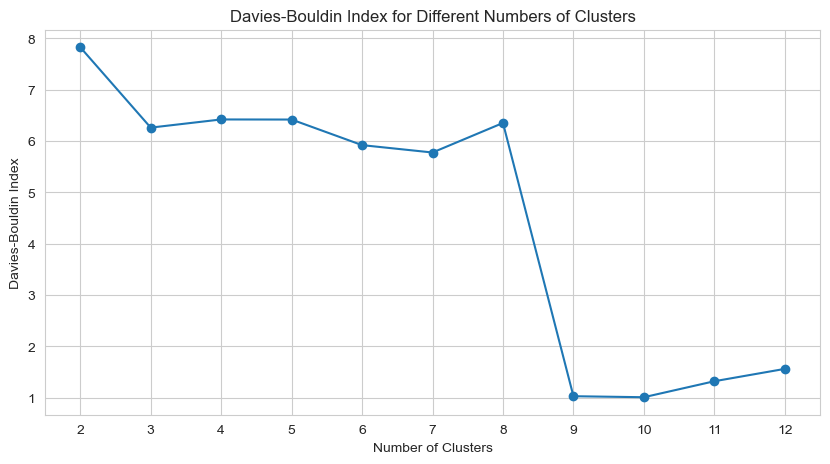

In [366]:
plt.figure(figsize=(10, 5))
plt.plot(num_clusters, db_scores, marker='o', linestyle='-')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.xticks(num_clusters)
plt.show()


We notice from Davies Bouldin Index graph that 9 clusters and 10 clusters. While we could go with either cluster numbers, we will go with k9 as our model since it's very close to k10 in wcss score and easier to analyze. So we have decided that **9 is the optimal K value**. 

In [367]:
kmedoids9 = KMedoids(n_clusters=9, random_state=0)
kmedoids9.fit(df_cluster)

KMedoids(n_clusters=9, random_state=0)

In [368]:
print('Unique labels:', np.unique(kmedoids9.labels_))

Unique labels: [0 1 2 3 4 5 6 7 8]


In [369]:
df['cluster'] = kmedoids9.labels_
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,cluster
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,2
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,6
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,6
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,7


## Clustering analysis

We will start by making a small supervised model to predict our clusters in order to examine the feature importance of each variable in predicting these clusters.

### ٍSupervised Model

In [370]:
# Target variable
y = df['cluster']

# Selecting all the features that we based our clusters on 
X = df[['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'FAF', 'CALC', 'MTRANS', 'NObeyesdad']]

# Encode categorical variables
categorical_columns = ['family_history_with_overweight', 'FAVC', 'CALC', 'MTRANS', 'NObeyesdad']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Fitting the model (We will be using Random forest)
rf = RandomForestClassifier(random_state=0)
rf.fit(X_encoded, y)

# feature importances
feature_importances = rf.feature_importances_

# Display feature importances
for feature, importance in zip(X_encoded.columns, feature_importances):
    print(f'Feature: {feature}, Importance: {importance}')


Feature: Age, Importance: 0.05008902563848557
Feature: Height, Importance: 0.04242537226980986
Feature: Weight, Importance: 0.156265794873247
Feature: FCVC, Importance: 0.02605678393337376
Feature: FAF, Importance: 0.029935437165658826
Feature: family_history_with_overweight_yes, Importance: 0.021398759978889566
Feature: FAVC_yes, Importance: 0.0036223412750341416
Feature: CALC_Frequently, Importance: 0.0025062014937195574
Feature: CALC_Sometimes, Importance: 0.032519203731600596
Feature: CALC_no, Importance: 0.05331100216919706
Feature: MTRANS_Bike, Importance: 0.0003240744504048175
Feature: MTRANS_Motorbike, Importance: 0.00037528519475880885
Feature: MTRANS_Public_Transportation, Importance: 0.005598066553226722
Feature: MTRANS_Walking, Importance: 0.0013372129369640876
Feature: NObeyesdad_Normal_Weight, Importance: 0.05324970053013247
Feature: NObeyesdad_Obesity_Type_I, Importance: 0.13551432309033518
Feature: NObeyesdad_Obesity_Type_II, Importance: 0.0917900980072354
Feature: NObe

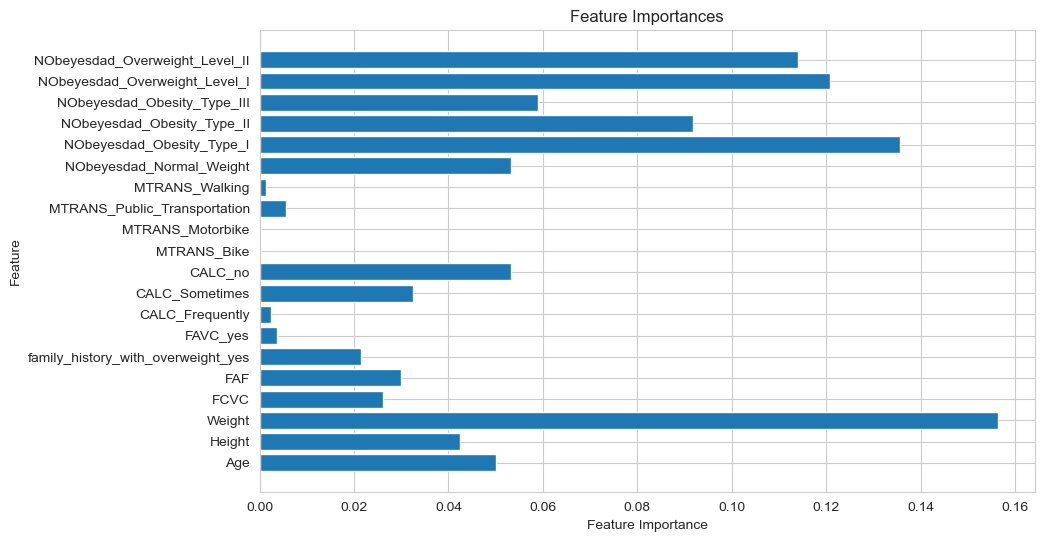

In [371]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_encoded.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Based on our model results, the top predictive variables for our clusters are `Weight`,`NObeyesdad`,`CALC`,`familiy_history_with_overweight`,`Age` and `Height`
which means these are variable contribute the most to determining the cluster.

Next, we will analyze these variable and see how they affect our clusters and the relation between our clusters and these factors.  

In [372]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,cluster
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,4.195168
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,2.713805
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,2.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,4.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,7.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,8.000000


In [373]:
# Convert 'Age' column to numeric type
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with non-numeric values (if any)
df = df.dropna(subset=['Age'])

# Convert 'Age' column to integer
df['Age'] = df['Age'].astype(int)

In [374]:
pd.set_option('display.max_columns', None)


In [375]:
df.groupby(by=['cluster','NObeyesdad']).size()

cluster  NObeyesdad         
0        Insufficient_Weight    152
         Normal_Weight           24
1        Overweight_Level_I     290
2        Insufficient_Weight    117
         Normal_Weight          107
3        Obesity_Type_II        297
4        Obesity_Type_III       185
5        Obesity_Type_III       139
6        Insufficient_Weight      3
         Normal_Weight          156
7        Overweight_Level_II    290
8        Obesity_Type_I         351
dtype: int64

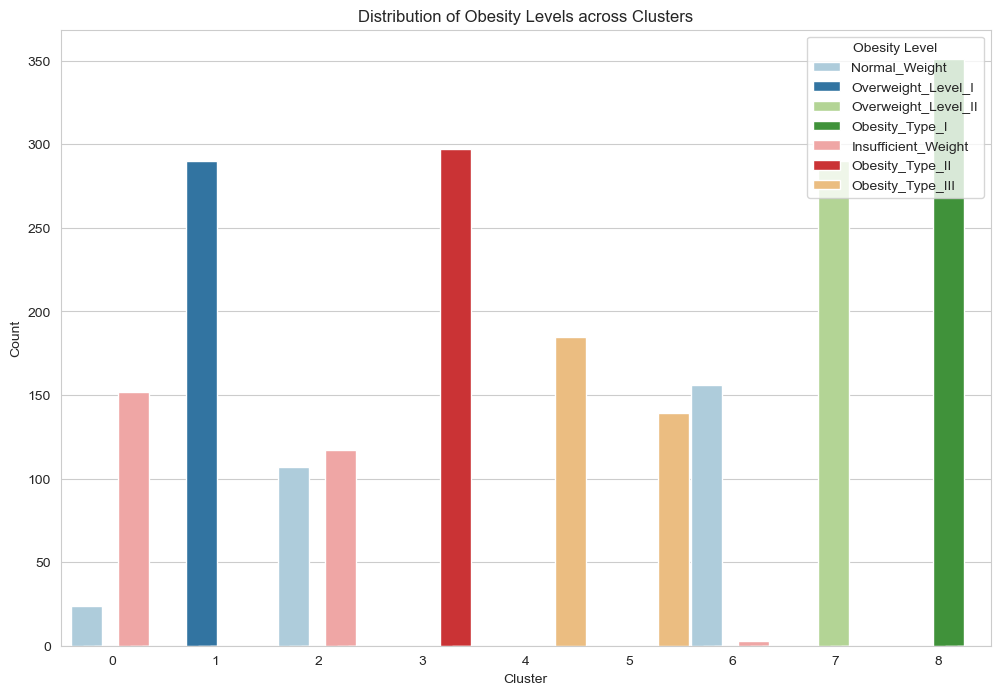

In [376]:

# Bar plot for each cluster and its obesity levels
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster', hue='NObeyesdad', data=df, dodge=True, palette='Paired')
plt.title('Distribution of Obesity Levels across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Obesity Level', loc='upper right')

# Adjust the width of the bars
for patch in plt.gca().patches:
    patch.set_width(0.3)

plt.show()


From this plot we can see that cluster 1, 3, 7 and 8 are mainly based on the obesity level as each of the clusters has 1 type of obesity level, so we will focus our analysis on clusters with similar obesity levels such as (0,2,6) and (4,5).

### Clusters (0,2,6)

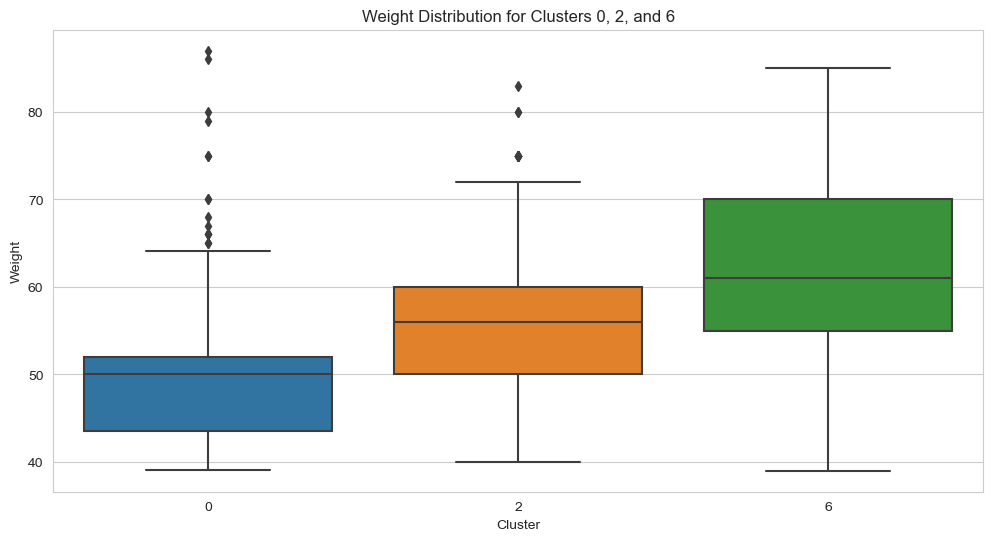

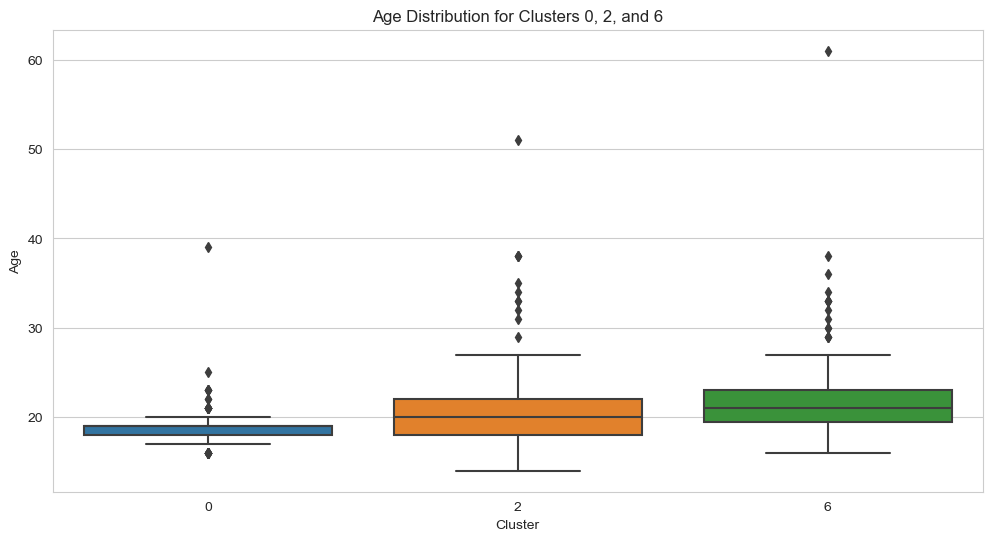

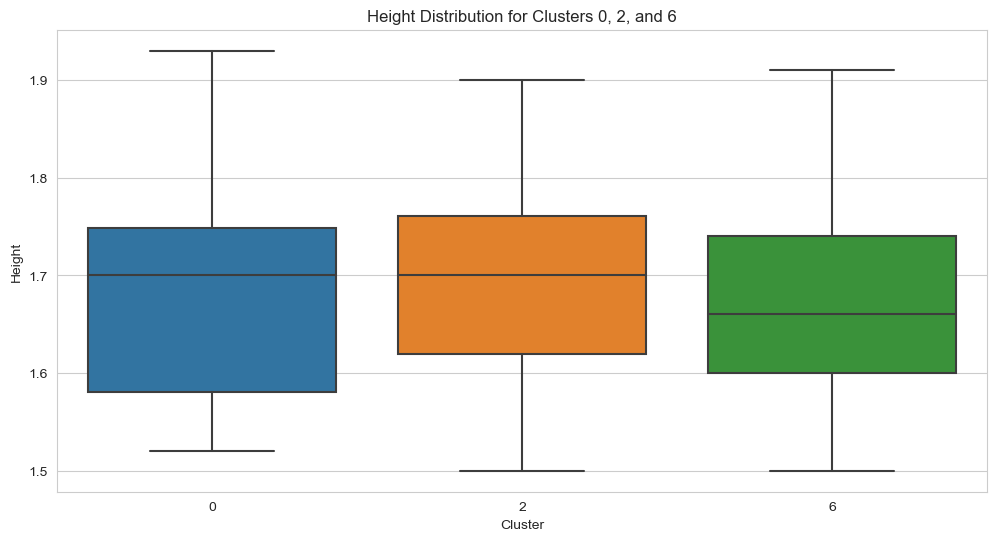

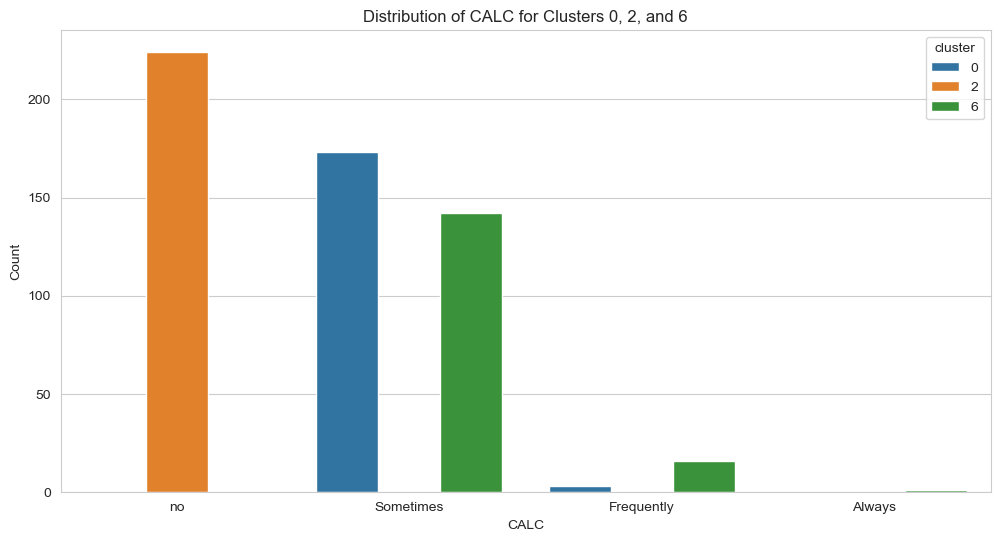

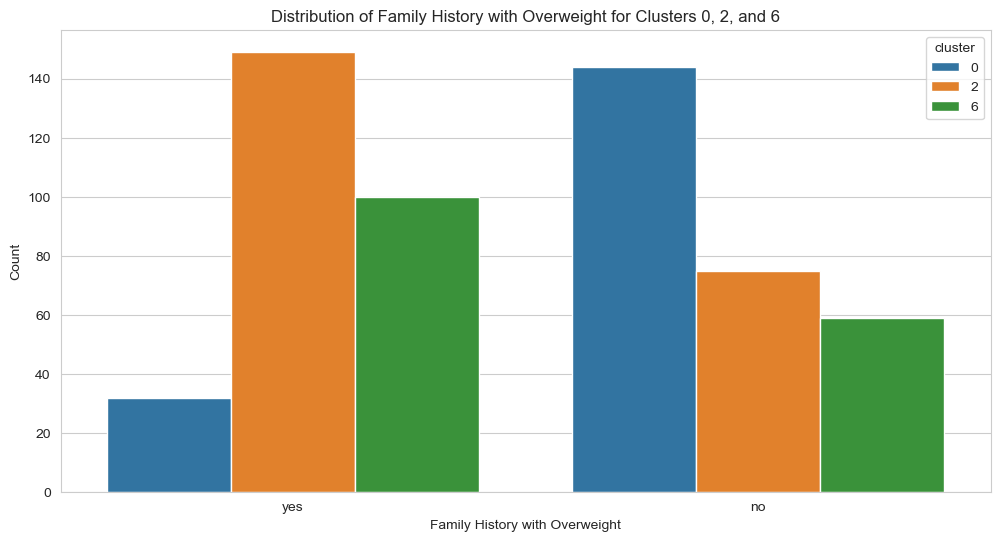

In [377]:

# Numerical columns 
numerical_columns = ['Weight', 'Age', 'Height']

#  visualize the distribution using box plots for each numerical column for clusters 0, 2, and 6
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[(df['cluster'] == 0) | (df['cluster'] == 2) | (df['cluster'] == 6)], x='cluster', y=column)
    plt.title(f'{column} Distribution for Clusters 0, 2, and 6')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()
# Count plot of 'CALC' for clusters 0, 2, and 6
plt.figure(figsize=(12, 6))
sns.countplot(data=df[(df['cluster'] == 0) | (df['cluster'] == 2) | (df['cluster'] == 6)], x='CALC', hue='cluster')
plt.title('Distribution of CALC for Clusters 0, 2, and 6')
plt.xlabel('CALC')
plt.ylabel('Count')
plt.show()

# Count plot of 'family_history_with_overweight' for clusters 0, 2, and 6
plt.figure(figsize=(12, 6))
sns.countplot(data=df[(df['cluster'] == 0) | (df['cluster'] == 2) | (df['cluster'] == 6)], x='family_history_with_overweight', hue='cluster')
plt.title('Distribution of Family History with Overweight for Clusters 0, 2, and 6')
plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.show()


### Analysis results for cluster (0,2,6)

**`Weight` Distribution:**

- The analysis of weight distribution across clusters reveals significant disparities. Cluster 6 exhibits the highest weight distribution, followed by cluster 2, while cluster 0 shows the least weight distribution. This observation aligns with the previous analysis of obesity levels, wherein cluster 0 predominantly represented insufficient weight, cluster 1 displayed a mix of insufficient and normal weight, and cluster 6 primarily consisted of individuals with normal weight, with few outliers.

**`Age` Distribution:**

- The distribution of age across clusters demonstrates minimal variation, suggesting that age may not be a significant contributing factor to the clustering and contributes only marginally to the differentiation between clusters.

**`Height` Distribution:**

- Although the height distribution appears relatively similar across clusters, cluster 6 exhibits a lower median height compared to clusters 0 and 2, indicating that individuals in cluster 6 tend to be shorter on average.

**Frequency of Alcohol Consumption (`CALC`):**

- Analysis of the frequency of alcohol consumption (CALC) reveals a notable distinction in cluster 2, where the majority of individuals do not consume alcohol. In contrast, clusters 0 and 6 show varying levels of alcohol consumption, indicating that this feature may be a primary differentiating factor for cluster 2.

**`Family History with Overweight`:**

- The distribution of family history with overweight issues (family_history_with_overweight) indicates that a significant proportion of individuals in cluster 0 do not have a family history of overweight issues. In contrast, approximately 60% of individuals in cluster 6 report a family history of overweight problems. This disparity, coupled with differences in weight distribution, appears to be a key factor driving the clustering process.

### Cluster (4,5)

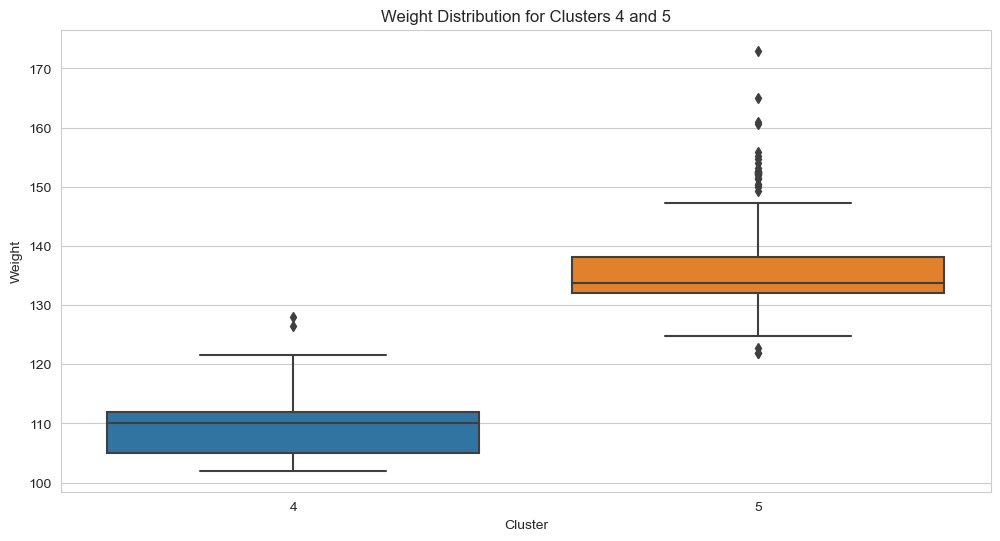

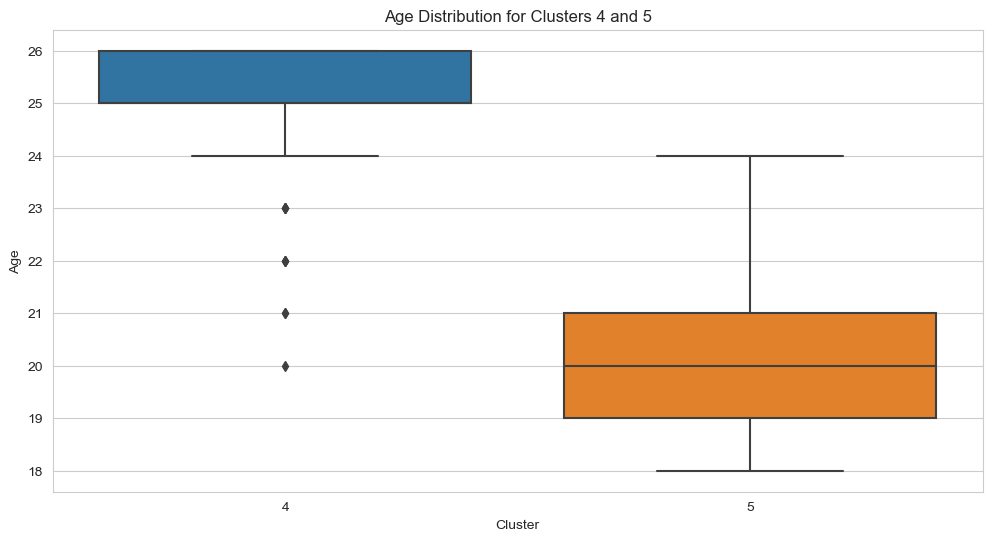

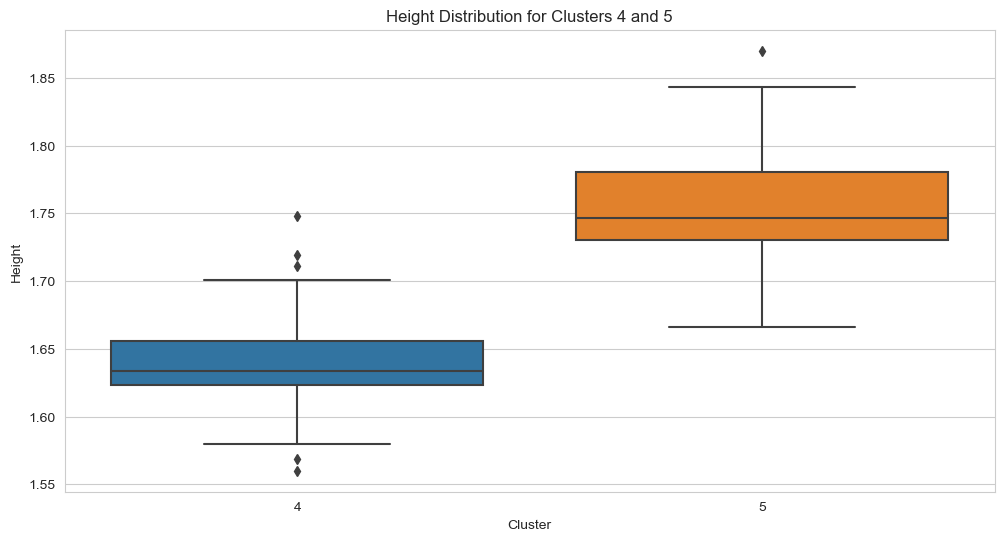

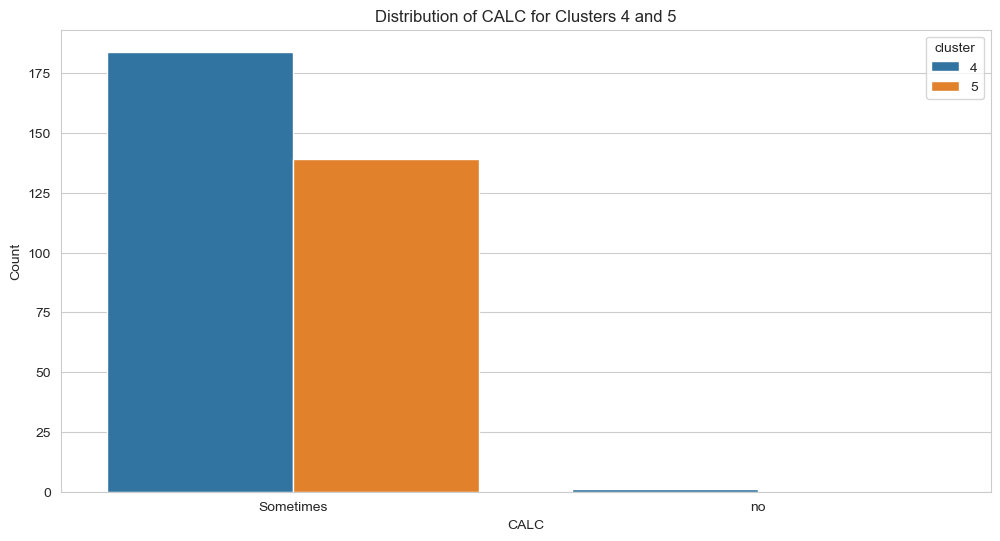

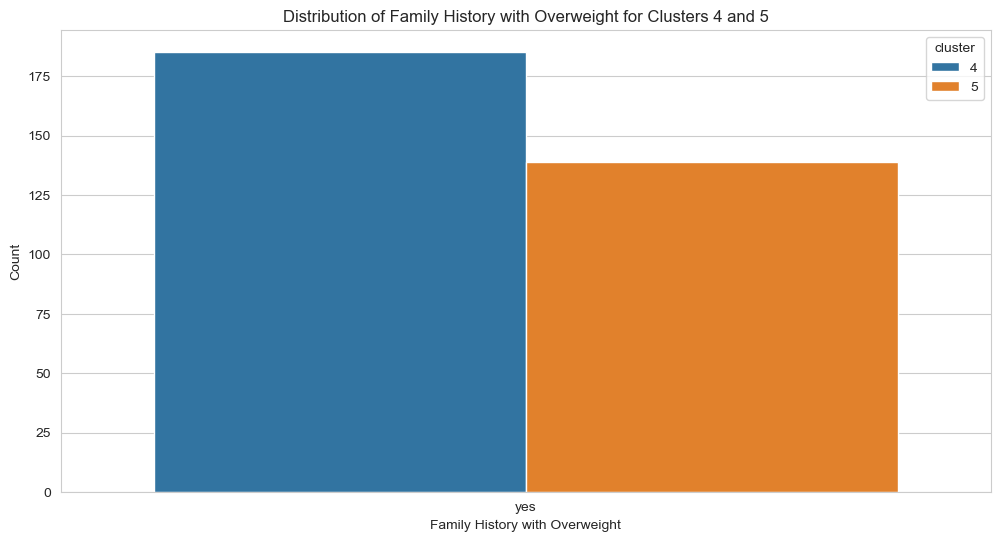

In [378]:
# visualize the distribution for numerical columns using box plots for clusters 4 and 5
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[(df['cluster'] == 4) | (df['cluster'] == 5)], x='cluster', y=column)
    plt.title(f'{column} Distribution for Clusters 4 and 5')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

# frequency distribution of 'CALC' for clusters 4 and 5
plt.figure(figsize=(12, 6))
sns.countplot(data=df[(df['cluster'] == 4) | (df['cluster'] == 5)], x='CALC', hue='cluster')
plt.title('Distribution of CALC for Clusters 4 and 5')
plt.xlabel('CALC')
plt.ylabel('Count')
plt.show()

# frequency distribution of 'family_history_with_overweight' using count plots for clusters 4 and 5
plt.figure(figsize=(12, 6))
sns.countplot(data=df[(df['cluster'] == 4) | (df['cluster'] == 5)], x='family_history_with_overweight', hue='cluster')
plt.title('Distribution of Family History with Overweight for Clusters 4 and 5')
plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.show()


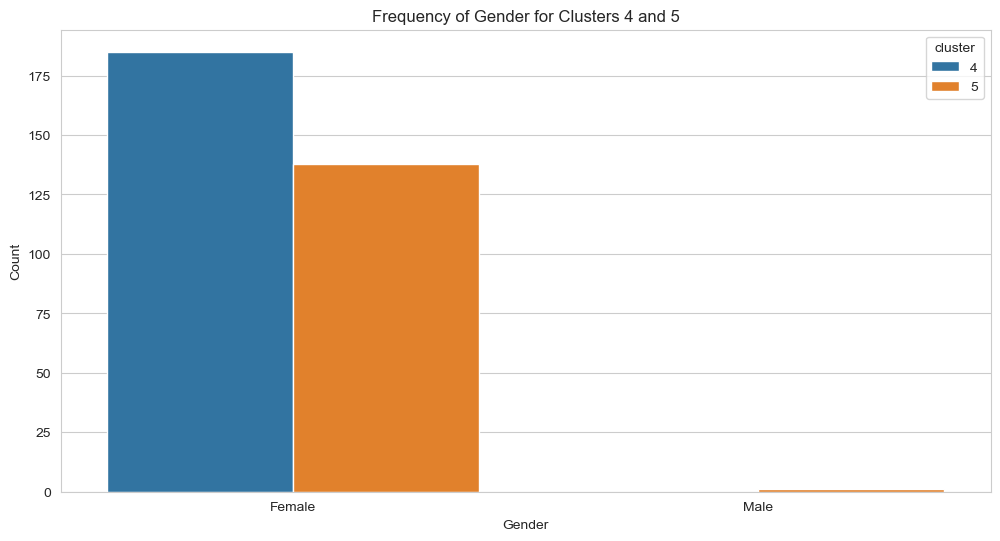

In [379]:
# Visualize the distribution of gender ('Gender') using count plots for clusters 4 and 5
plt.figure(figsize=(12, 6))
sns.countplot(data=df[(df['cluster'] == 4) | (df['cluster'] == 5)], x='Gender', hue='cluster')
plt.title('Frequency of Gender for Clusters 4 and 5')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### Analysis results for cluster (4,5) 

**`Weight` Distribution:**

- Cluster 5 exhibits a higher weight distribution compared to Cluster 4, with approximately a 25 kg difference.

**`Age` Distribution:**

- The age distribution indicates that individuals in Cluster 5 fall within the 19-21 age range, while those in Cluster 4 are typically aged between 25-26, albeit with a few outliers.

**`Height` Distribution:**

- Cluster 5 shows a higher distribution of height compared to Cluster 4, with a difference of around 15 cm.

**Frequency of Alcohol Consumption (`CALC`) and `Family History with Overweight`:**

- There doesn't appear to be a significant difference in the distribution of responses for both CALC and Family History with Overweight between the two clusters. However, it's noteworthy that individuals in both clusters predominantly reported having a family history of overweight issues, suggesting a possible genetic predisposition contributing to their obesity.

**`Gender` Distribution:**

- Analysis of gender distribution indicates that Cluster 5 is primarily composed of young obese females, whereas Cluster 4 is predominantly comprised of young adult obese females. It's noteworthy that Cluster 4 appears to consist entirely of females, while Cluster 5 shows a majority of females with a small male population.

### Analysis Conclusion

- The analysis of the resulting clusters reveals significant differences in weight distribution, with cluster 6 showing the highest weight and cluster 0 the lowest. Family history with overweight issues also plays a crucial role, with cluster 6 having a higher proportion reporting such history. Additionally, cluster 2 stands out for its lower frequency of alcohol consumption compared to clusters 0 and 6.

- Finally, the analysis of clusters 4 and 5 highlights significant differences in weight, height, and age distributions, with cluster 5 exhibiting higher weight and height distributions and younger age compared to cluster 4. While both clusters share similarities in factors such as family history of overweight issues and alcohol consumption habits, the observed variations in weight, height, and age underscore the complex nature of obesity clustering. 

## Hierarchial Clustering

We will be testing different combination of Linkaged methods and distance metrics to determine what the best parameters are for our hierarchial clustering based on our evaluation metric silhouette score 


In [380]:
from scipy.cluster.hierarchy import dendrogram, linkage
from gower import gower_matrix
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score



## Parameter Selection

In [ ]:
# Dictionary to store silhouette scores for each method
silhouette_scores = {}


for method in ['single', 'complete', 'average', 'ward']:
    # Dictionary to store silhouette scores for each distance metric
    method_scores = {}
    for metric in ['euclidean', 'cityblock', 'gower']:
        # Hierarchical clustering
        if method == 'ward' and metric != 'euclidean':
            continue  # Skip non-Euclidean metrics for 'ward' method
        elif metric == 'gower':
            distance_matrix = gower_matrix(df_cluster)
            Z = linkage(distance_matrix, method=method)
        else:
            Z = linkage(df_cluster, method=method, metric=metric)
        
        # List for the silhouette scores of the current metric
        scores = []
        
        # Testing clusters from 5 to 12
        for n_clusters in range(5, 13):
            
            labels = fcluster(Z, n_clusters, criterion='maxclust')
            
            # Calculate silhouette score
            silhouette = silhouette_score(df_cluster, labels)
            
            scores.append(silhouette)
        
        # Add the metric scores to the method scores dictionary
        method_scores[metric] = scores
    
    # add the method scores to the silhouette score dictionary
    silhouette_scores[method] = method_scores

# Print silhouette scores for each method, distance metric, and number of clusters
for method, method_scores in silhouette_scores.items():
    print(f"Silhouette scores for {method} linkage method:")
    for metric, scores in method_scores.items():
        print(f"Distance Metric: {metric}")
        for n_clusters, score in zip(range(5, 13), scores):
            print(f"Clusters: {n_clusters}, Silhouette Score: {score:.3f}")
        print()
    print()


Upon analysis of the given values for each method and distance metric, the silhouette scores for ward linkage with euclidean distance metrics seem to the best values 

In [383]:
Z = linkage(df_cluster, method='ward', metric='euclidean')

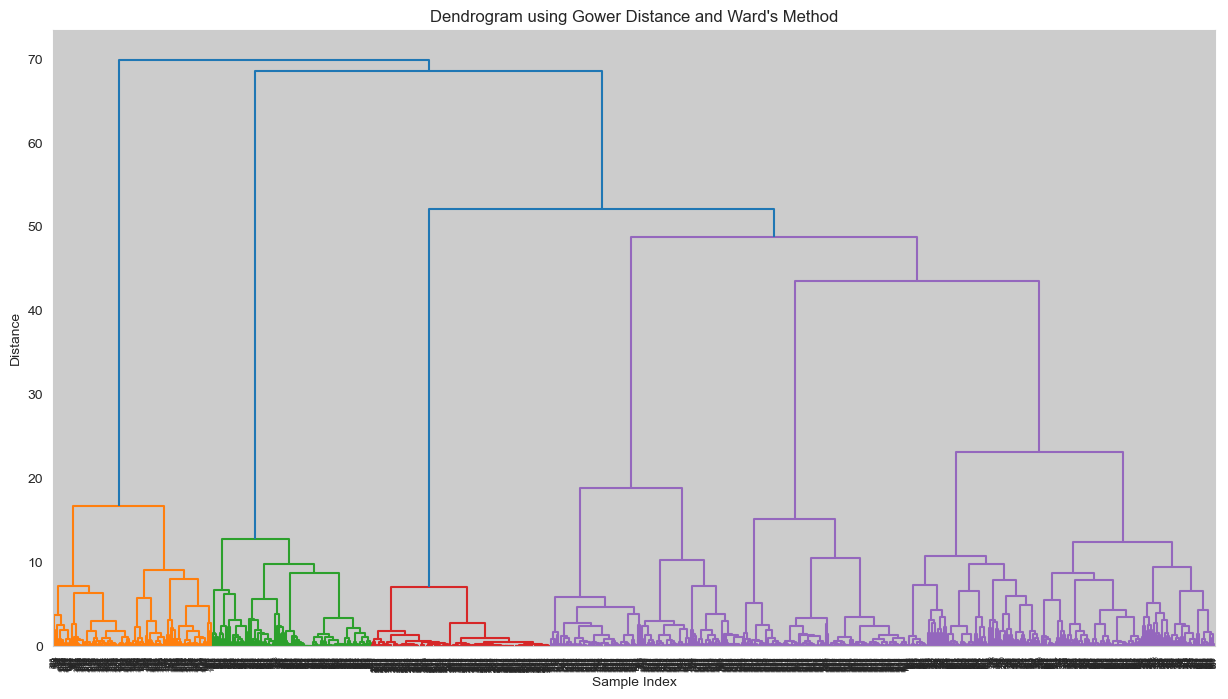

In [384]:
# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z)
plt.title('Dendrogram using Gower Distance and Ward\'s Method')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


## Silhouette Score

The silhouette score measures the quality of clustering in a dataset. It quantifies how similar an object is to its cluster compared to other clusters. A high silhouette score indicates that the object is well matched to its cluster and poorly matched to neighboring clusters, suggesting a clear separation between clusters. Conversely, a low silhouette score suggests that the object may be assigned to the wrong cluster or that the clusters overlap. In summary, a higher silhouette score indicates better-defined clusters, while a lower silhouette score suggests less distinct clusters.

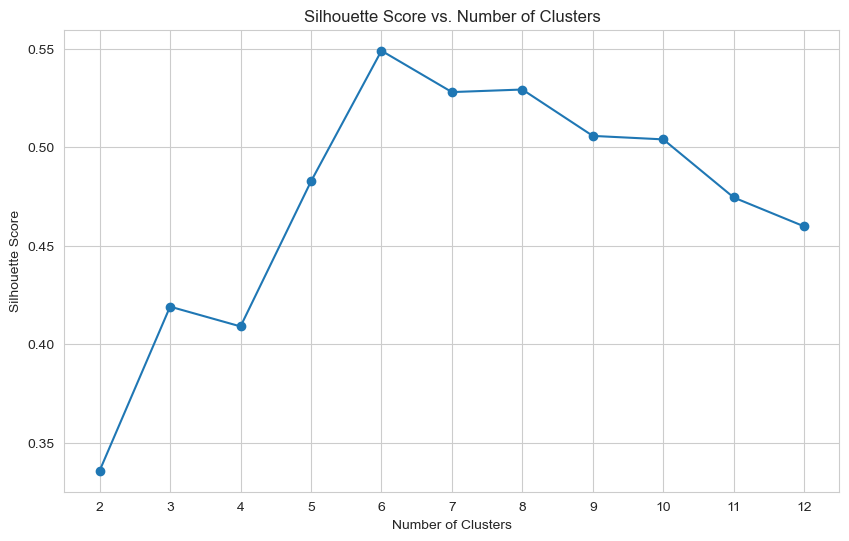

In [385]:
silhouette_scores = []
for k in range(2, 13): 
    labels = fcluster(Z, k, criterion='maxclust')
    silhouette_avg = silhouette_score(df_cluster, labels, metric='euclidean')
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 13), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(np.arange(2, 13, step=1))
plt.grid(True)
plt.show()

Seems that using hierarchial clustering with ward linkage and distance metric euclidean, the best number of clusters is 6 clusters with silhouette score of ~ .55

In [386]:
labels = fcluster(Z, 6, criterion='maxclust')

df_hierarchial['cluster'] = labels

In [387]:
df_hierarchial

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,cluster
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,6
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,6
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,6
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,2
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,3
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,3
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,3
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,3


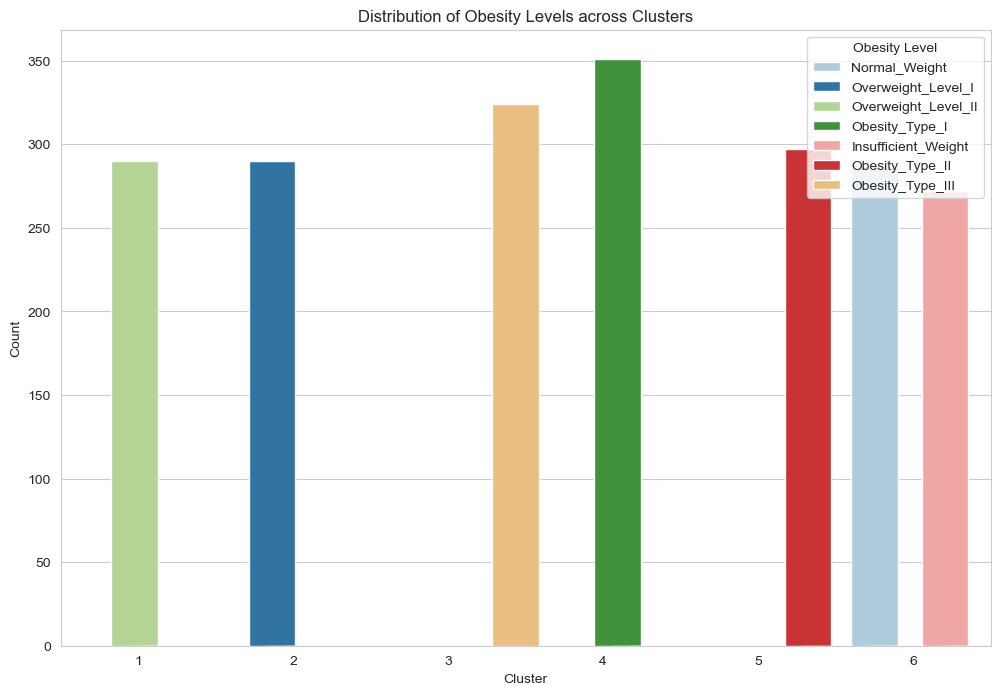

In [388]:
# Bar plot for each cluster and its obesity levels
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster', hue='NObeyesdad', data=df_hierarchial, dodge=True, palette='Paired')
plt.title('Distribution of Obesity Levels across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Obesity Level', loc='upper right')

# Adjust the width of the bars
for patch in plt.gca().patches:
    patch.set_width(0.3)

plt.show()


Seems hierarchial clustering with given parameters and weighted obesity level captured 6 groups, with cluster 6 being underweight and normal weight which is due to their weight being close to each other.

With this plot showing us what the clustering was based on there is no need for further analysis.

# Summary

### Feature Engineering:

- Utilized MinMaxScaler to standardize numerical variables like Age, Height, and Weight, ensuring equal weight in clustering.
- Encoded categorical variables using one-hot encoding to facilitate their use in clustering, maintaining uniformity in feature representation.

### Kmedoids Clustering
### Determining Optimal Number of Clusters:

- Employed the elbow method and Davies-Bouldin Index to identify the optimal number of clusters, resulting in the selection of 10 clusters.

### Feature Importance Analysis:

- Employed a supervised model to determine feature importance in predicting clusters, revealing Weight, Obesity Level, Alcohol Consumption Frequency, Family History with Overweight, Age, and Height as significant contributors.

### Clustering Analysis:

   **Clusters 0, 2, and 6:**

- Weight Distribution: Cluster 6 exhibited the highest weight distribution, followed by cluster 2, while cluster 0 displayed the least weight distribution, aligning with their respective obesity levels.

- Age Distribution: Minimal variation observed, indicating age's marginal role in cluster differentiation.
- Height Distribution: Cluster 6 displayed a lower median height compared to clusters 0 and 2.
- Alcohol Consumption Frequency (CALC): Notable distinction in cluster 2, where the majority abstained from alcohol.
- Family History with Overweight: Cluster 0 had fewer individuals with a family history of overweight, contrasting with approximately 60% in cluster 6.

**Clusters 4 and 5:**

- Weight Distribution: Cluster 5 exhibited higher weight distribution compared to cluster 4.
- Age Distribution: Cluster 5 comprised younger individuals (19-21 years), while cluster 4 included slightly older individuals (25-26 years).
- Height Distribution: Cluster 5 displayed a higher distribution of height compared to cluster 4.
- Alcohol Consumption Frequency (CALC) and Family History with Overweight: No significant differences observed between clusters.
- Gender Distribution: Cluster 5 primarily comprised young obese females, while cluster 4 predominantly consisted of young adult obese females, with cluster 4 being exclusively female.


Our clustering analysis elucidated distinct patterns in the dataset, revealing varying distributions of weight, age, height, alcohol consumption frequency, and family history with overweight across different clusters. These findings underscore the multifaceted nature of obesity clustering and provide valuable insights for tailored intervention strategies to address diverse population segments effectively.

### Hierarchial Clustering

### Determining optimal parameters and optimal number of clusters 

- We explored different combinations of linkage methods and distance metrics to identify the optimal parameters for clustering. Silhouette scores indicated that Ward linkage with the Euclidean distance metric produced the most favorable results. Utilizing hierarchical clustering with these parameters, we identified six clusters.

### Cluster Analysis

- Cluster analysis showed that the clustering was based on types of obesity level which were fit into 6 clusters. 

- Notably, cluster 6 captured individuals who were underweight or within the normal weight range, suggesting that hierarchical clustering effectively captured nuanced distinctions in obesity patterns.

# Conclusion and Recommendations

In this section, we analyzed factors contributing to obesity levels through k-medoids and hierarchical clustering techniques. After thorough feature engineering and determination of optimal clusters, we uncovered significant contributors such as weight, age, alcohol consumption frequency, and family history of overweight.

Our analysis unveiled distinct patterns across clusters, shedding light on demographic, behavioral, and clinical factors influencing obesity prevalence. Integrating k-medoids and hierarchical clustering provided comprehensive insights into obesity trends, enabling targeted interventions tailored to specific population segments.

**Recommendations** based on our findings include implementing tailored intervention strategies focusing on weight management, alcohol consumption reduction, and family health education. Additionally, targeted programs addressing demographic disparities and promoting healthy lifestyle behaviors can enhance obesity prevention and management efforts.
